In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
final_db = pd.read_csv('../../test_run_1.csv')

In [4]:
# Get a list of column names in the DataFrame
column_names = final_db.columns.tolist()

# Print the list of column names
print(column_names)

['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 'EUD01_05', 'EUD01_06', 'EUD01_07', 'EUD01_08', 'EUD01_09', 'EUD01_96', 'EUD01_97', 'EUD01_99', 'id', 'Generation', 'HH02', 'HH03', 'HH04', 'IN02', 'IN05', 'SI03_3_H', 'PB01_mod', 'S01_mod', 'SI06_mod', 'HLS02_mod', 'DHO01_mod', 'DEGURBA_mod', 'DHE01_mod', 'DHE02_mod', 'DHE03_mod', 'DHE04_mod', 'RA04_mod', 'VV10', 'res_stat_mod_1', 'arop_mod', 'RA03', 'VH01a', 'DO27_mod']


In [6]:
# Define the target variable
def check_discrimination(row):
    if any(row[col] == 1 for col in ['EUD01_09', 'EUD01_96', 'EUD01_97', 'EUD01_99']):
        return 0  # No discrimination occurred
    elif any(row[col] == 1 for col in ['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 
                                       'EUD01_05', 'EUD01_06', 'EUD01_07', 'EUD01_08']):
        return 1  # Discrimination occurred

# Create the binary discrimination variable
final_db['discrimination_occurred'] = final_db.apply(check_discrimination, axis=1)

# Drop variables used to construct discrimination_occurred
final_db.drop(['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 
               'EUD01_05', 'EUD01_06', 'EUD01_07', 'EUD01_08',
               'EUD01_09', 'EUD01_96', 'EUD01_97', 'EUD01_99'], axis=1, inplace=True) 

# Check distribution of the binary discrimination variable
print(final_db['discrimination_occurred'].value_counts())

discrimination_occurred
0    8236
1    5170
Name: count, dtype: int64


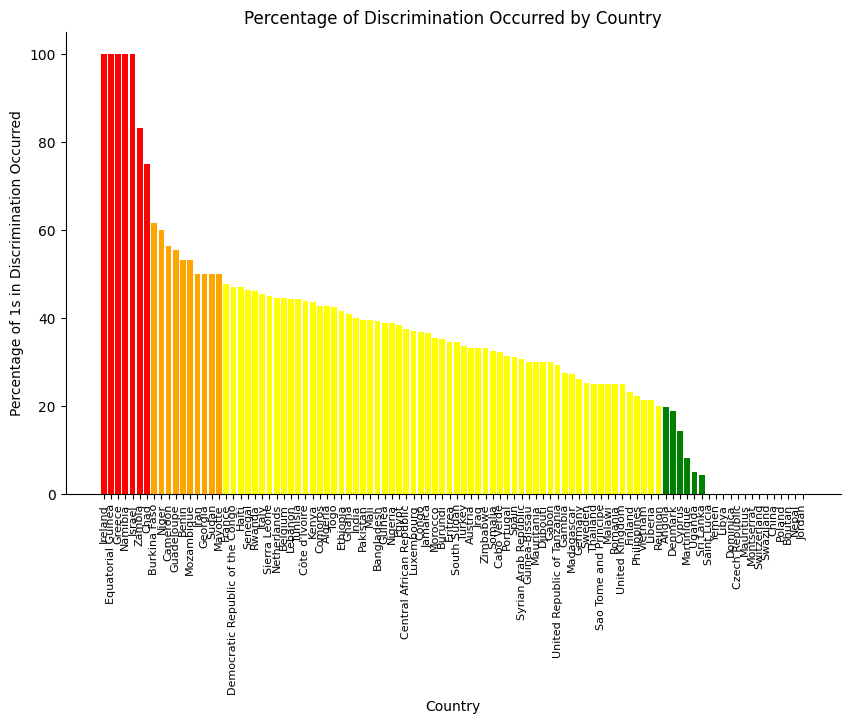

In [19]:
# Load the country codes CSV file with semicolon separator
country_codes = pd.read_csv('../01_data/country_codes.csv', sep=';')

# Assuming final_db is your DataFrame
# Group by the 'IN05' column (country) and calculate the percentage of 1s in 'discrimination_occurred'
percentages = final_db.groupby('IN05')['discrimination_occurred'].mean() * 100

# Convert 'percentages' Series to DataFrame and reset index to have 'IN05' as a column
percentages_df = percentages.reset_index()

# Merge 'percentages_df' with 'country_codes' DataFrame based on the 'IN05' column
merged_data = pd.merge(percentages_df, country_codes, left_on='IN05', right_on='Value', how='left')

# Sort the merged data by percentage in descending order
merged_data_sorted = merged_data.sort_values(by='discrimination_occurred', ascending=False)

# Function to determine bar color based on value
def get_bar_color(value):
    if value > 70:
        return 'red'
    elif value >= 50:
        return 'orange'
    elif value >= 20:
        return 'yellow'
    else:
        return 'green'

# Create bar colors list based on values
bar_colors = merged_data_sorted['discrimination_occurred'].apply(get_bar_color).tolist()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_data_sorted['Label'], merged_data_sorted['discrimination_occurred'], color=bar_colors, edgecolor='none')

# Add titles and labels
plt.title('Percentage of Discrimination Occurred by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of 1s in Discrimination Occurred')

# Rotate x-axis labels for better readability and make labels smaller
plt.xticks(rotation=90, fontsize=8)

# Remove outline except for the axes themselves
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Add spacing between bars by adjusting bar width
for bar in bars:
    bar.set_width(0.8)  # Adjust this value for more spacing

# Display the plot
plt.show()

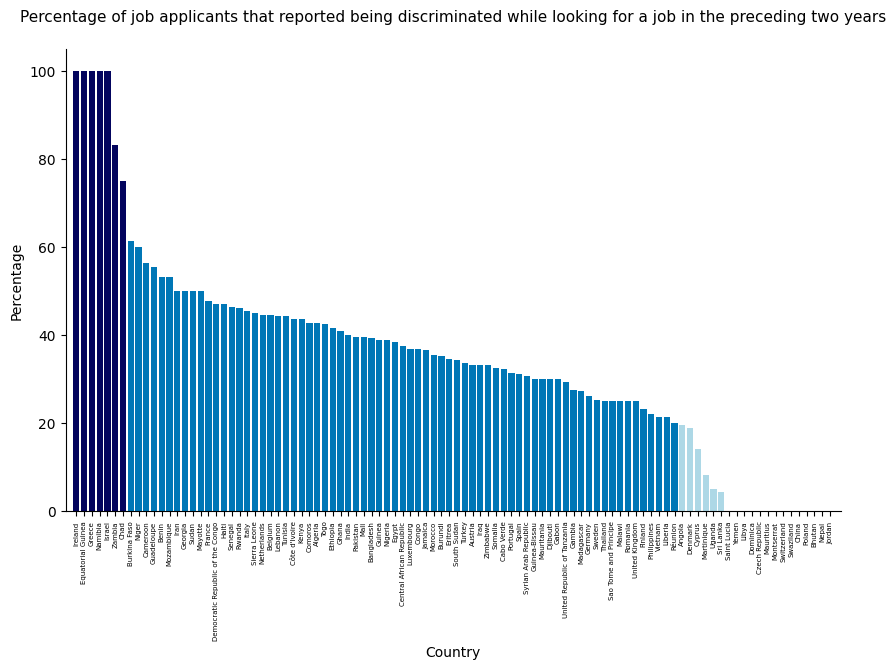

In [38]:
# Load the country codes CSV file with semicolon separator
country_codes = pd.read_csv('../01_data/country_codes.csv', sep=';')

# Assuming final_db is your DataFrame
# Group by the 'IN05' column (country) and calculate the percentage of 1s in 'discrimination_occurred'
percentages = final_db.groupby('IN05')['discrimination_occurred'].mean() * 100

# Convert 'percentages' Series to DataFrame and reset index to have 'IN05' as a column
percentages_df = percentages.reset_index()

# Merge 'percentages_df' with 'country_codes' DataFrame based on the 'IN05' column
merged_data = pd.merge(percentages_df, country_codes, left_on='IN05', right_on='Value', how='left')

# Sort the merged data by percentage in descending order
merged_data_sorted = merged_data.sort_values(by='discrimination_occurred', ascending=False)

# Function to determine bar color based on value
def get_bar_color(value):
    if value > 70:
        return '#03045e'
    elif value >= 20:
        return '#0077b6'
    else:
        return 'lightblue'

# Create bar colors list based on values
bar_colors = merged_data_sorted['discrimination_occurred'].apply(get_bar_color).tolist()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_data_sorted['Label'], merged_data_sorted['discrimination_occurred'], color=bar_colors, edgecolor='none')

# Add titles and labels
plt.title('Percentage of job applicants that reported being discriminated while looking for a job in the preceding two years', fontsize=11, pad=20)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Percentage', fontsize=10)

# Rotate x-axis labels for better readability and make labels smaller
plt.xticks(rotation=90, fontsize=5)

# Remove outline except for the axes themselves
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Adjust the layout to reduce space between the y-axis and the first bar and the last bar and the end of the plot
plt.margins(x=0.01, tight=True)

# Display the plot
plt.show()